In [ ]:
!nvidia-smi

Sat May 17 06:27:26 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 882.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 39.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
from ultralytics import YOLO
import os


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model = YOLO('yolov8n.yaml')

In [ ]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="3Sx95CdrpEn99djph2wM")
project = rf.workspace("project-xropk").project("interior-ckt3l")
dataset = project.version(2).download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 90.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Interior-2 in yolov8:: 100%|██████████| 810/810 [00:00<00:00, 6620.03it/s]


In [ ]:
import yaml

# Path to the downloaded dataset
yaml_path = "/content/Interior-2/data.yaml"

# Load YAML and extract class names
with open(yaml_path, 'r') as file:
    data = yaml.safe_load(file)

class_names = data['names']
print("Class names:", class_names)


Class names: ['bed', 'cushion', 'dinning table', 'door', 'fan', 'lamp', 'mat', 'plant', 'sofa', 'table', 'tv', 'window']


In [ ]:
from PIL import Image
from IPython.display import display
img =  Image.open('/content/Interior-2/train/images/blog-door1_jpg.rf.37286c8bccb8ab2ed113e56ededc98bd.jpg')
img.size

(640, 640)

In [ ]:
!yolo detect train data=/content/Interior-2/data.yaml model=yolov8n.yaml epochs=60 imgsz=640

Ultralytics 8.3.137 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Interior-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrai

In [ ]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=/content/Interior-2/valid/images save=True

Ultralytics 8.3.137 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,007,988 parameters, 0 gradients, 8.1 GFLOPs

image 1/35 /content/Interior-2/valid/images/Bed_Room-1216-_jpg.rf.a3734ee9f6d1af57191519e8541c7c02.jpg: 640x640 1 cushion, 10.8ms
image 2/35 /content/Interior-2/valid/images/door_jpg.rf.452a0269a1f5137dd438cf674d0a583e.jpg: 640x640 1 lamp, 7.4ms
image 3/35 /content/Interior-2/valid/images/suggested-0RqOMLBojBlnNy23LveC_jpg.rf.f8c8ac713947503c634791d3cf46df84.jpg: 640x640 (no detections), 7.4ms
image 4/35 /content/Interior-2/valid/images/suggested-3RIH2vbEUdwaynDEoMg6_jpg.rf.9e94435c76ea25a9f0ed128844466f0b.jpg: 640x640 (no detections), 7.4ms
image 5/35 /content/Interior-2/valid/images/suggested-3qUQrnKWUWVaoeAqjUXq_jpg.rf.c8cce40eeb45cec5e5f51083e962c9e3.jpg: 640x640 1 fan, 1 tv, 1 window, 7.4ms
image 6/35 /content/Interior-2/valid/images/suggested-4KZdEzyfoJxRv2M4Ksjs_jpg.rf.1dd1c41ac893ff0aaa263fa2234bbecf.jpg: 640x640 (

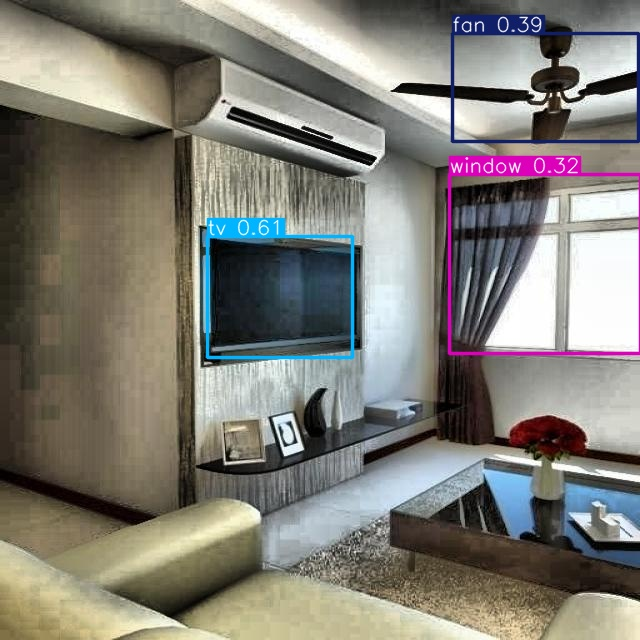

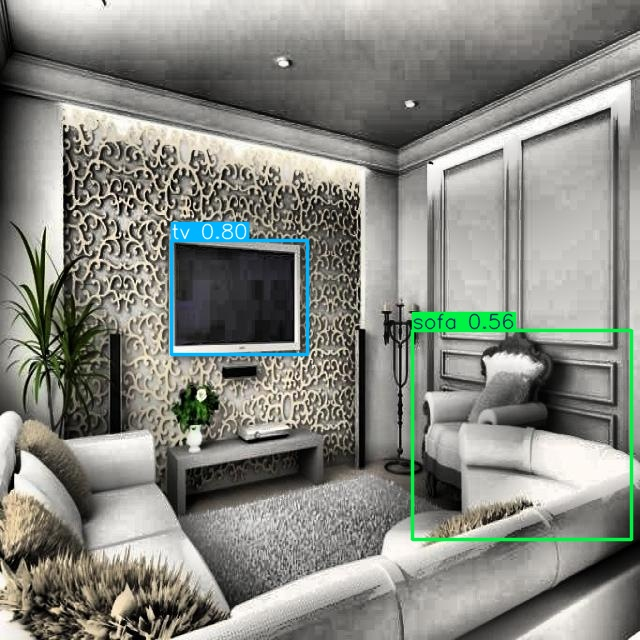

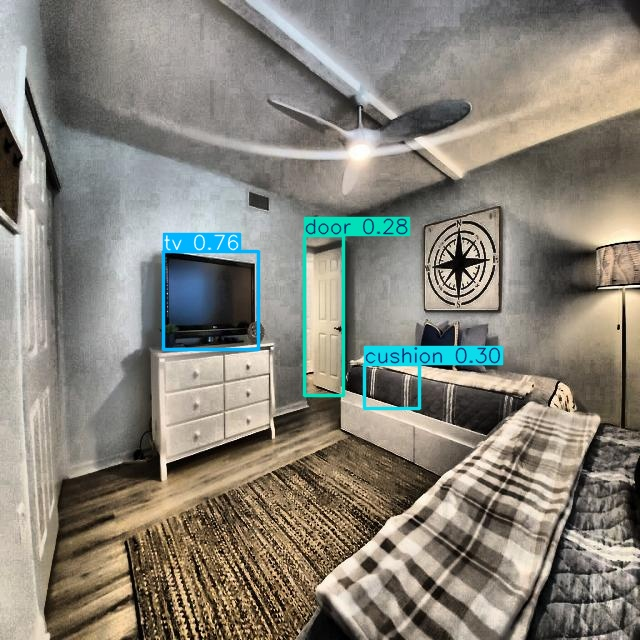

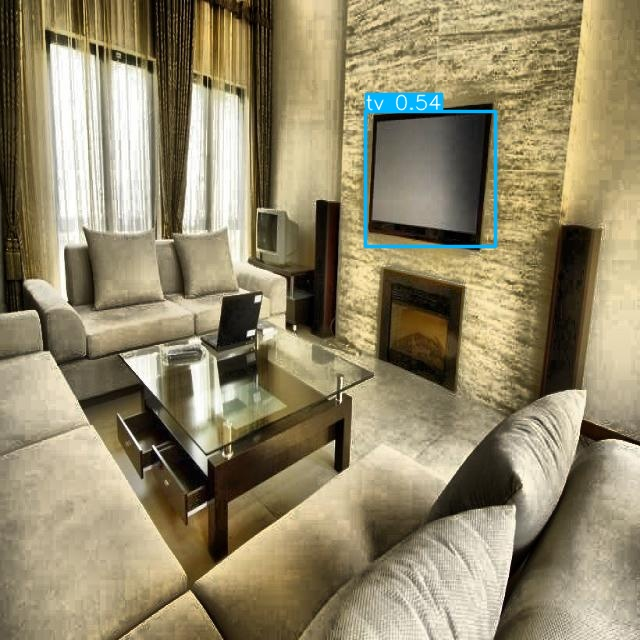

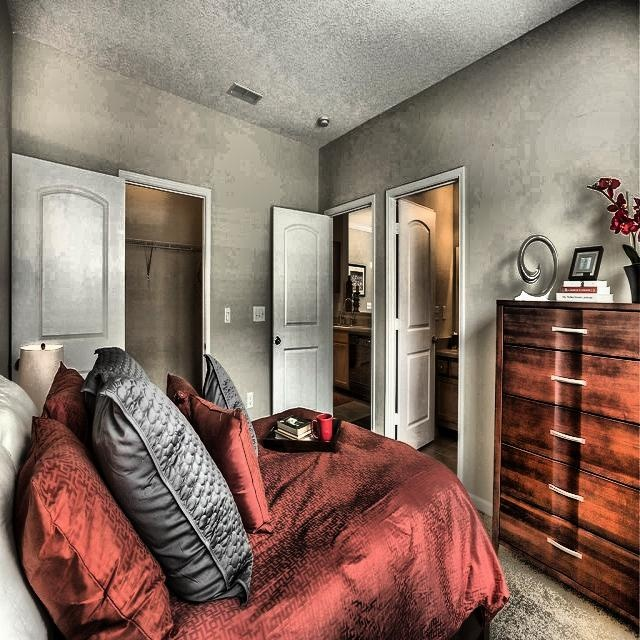

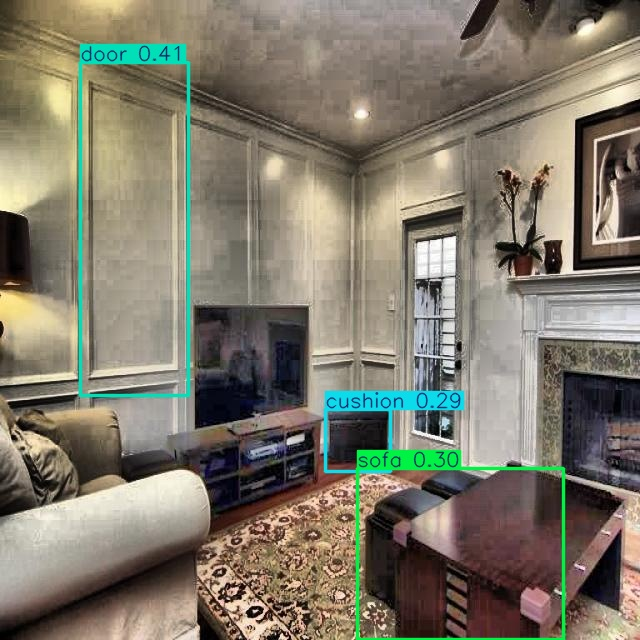

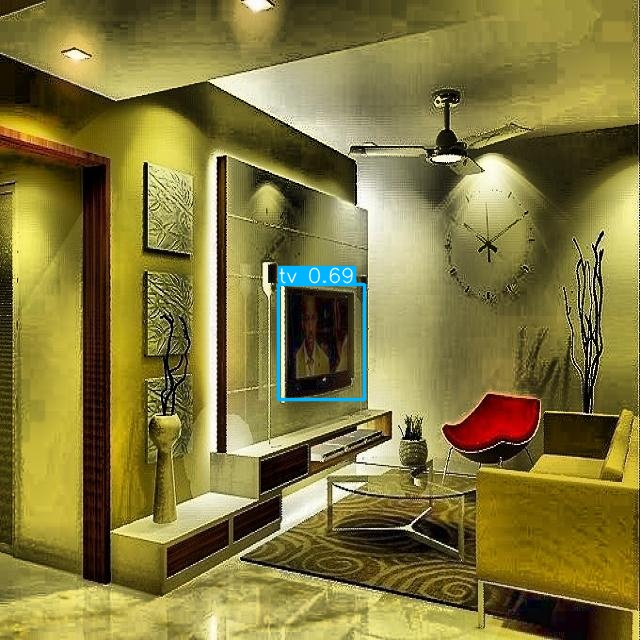

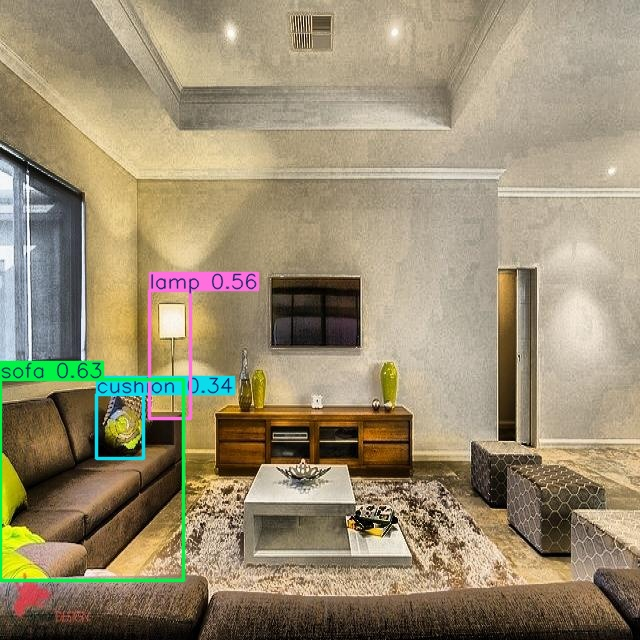

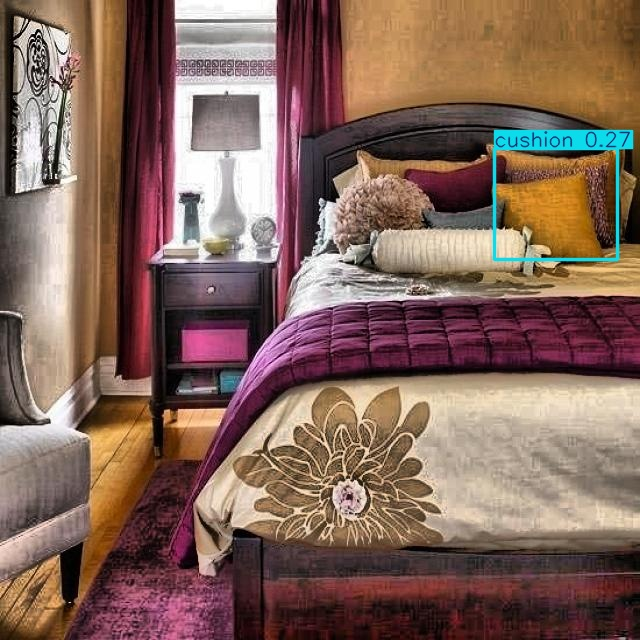

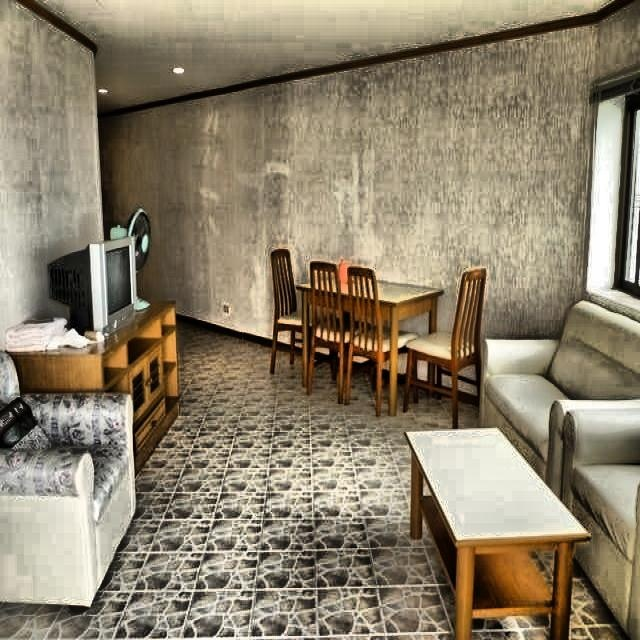

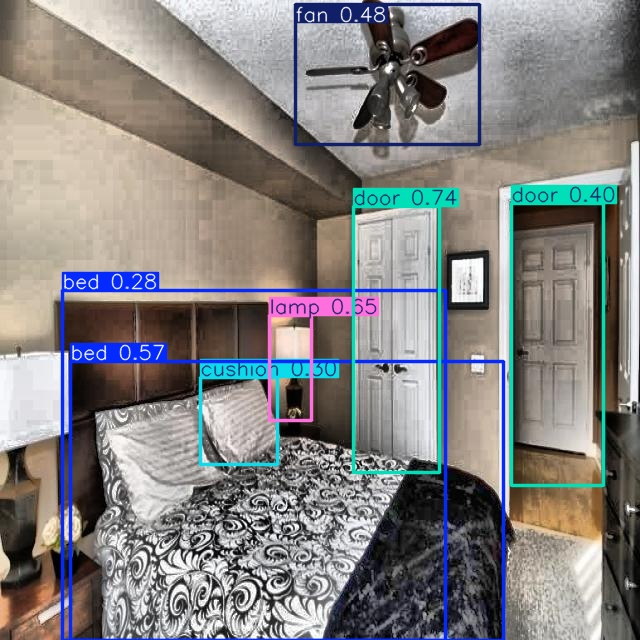

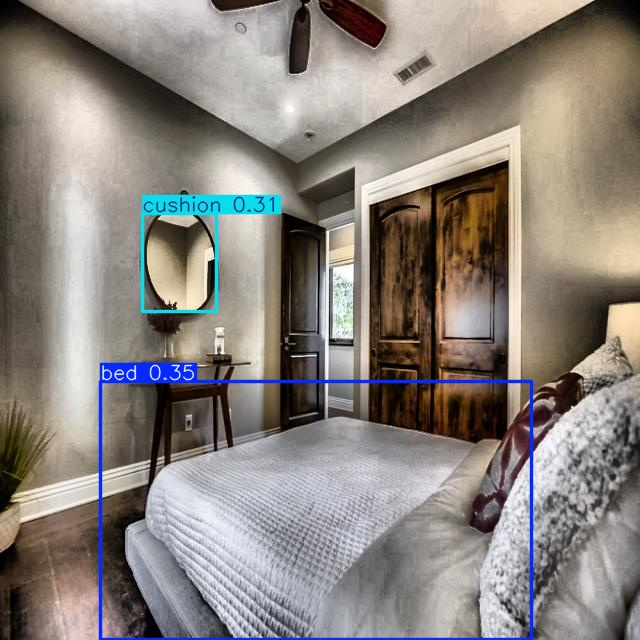

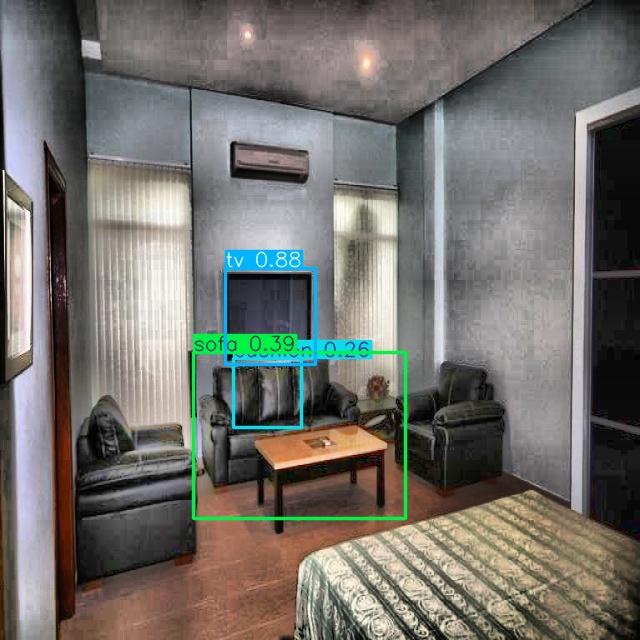

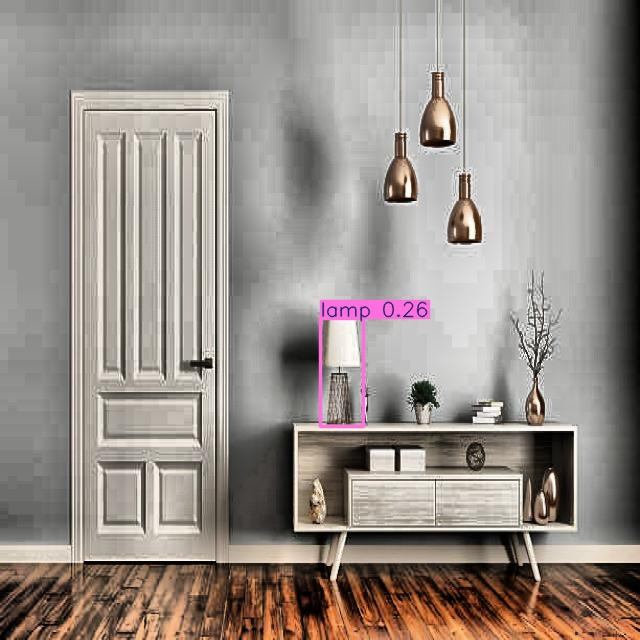

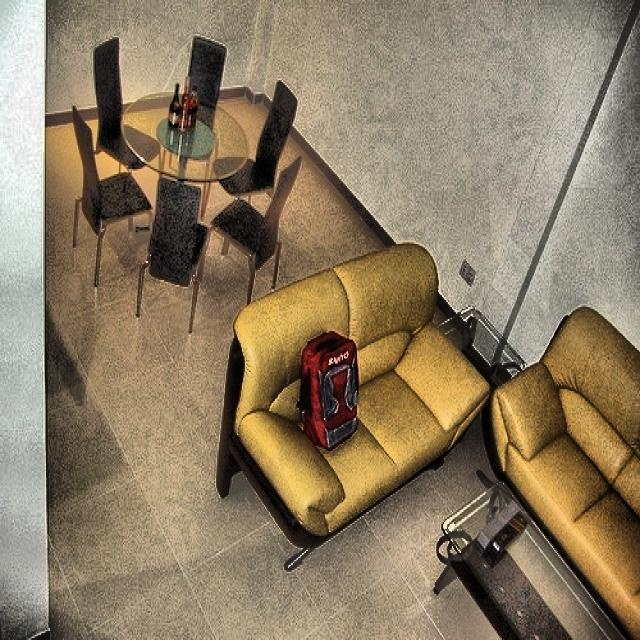

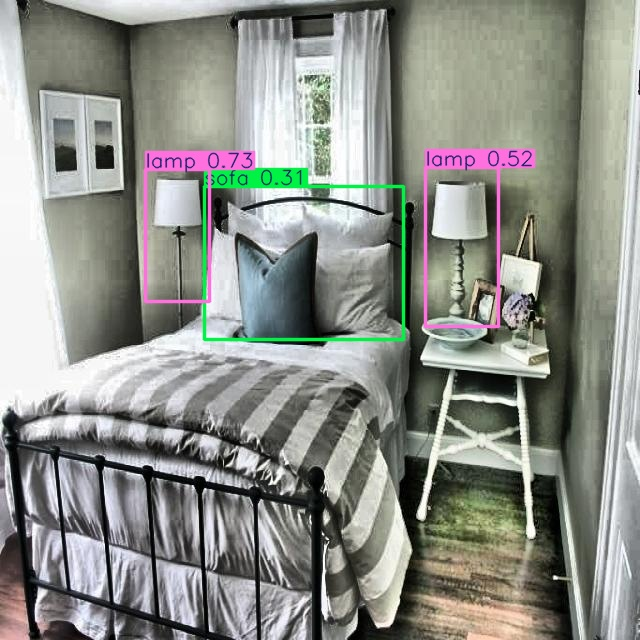

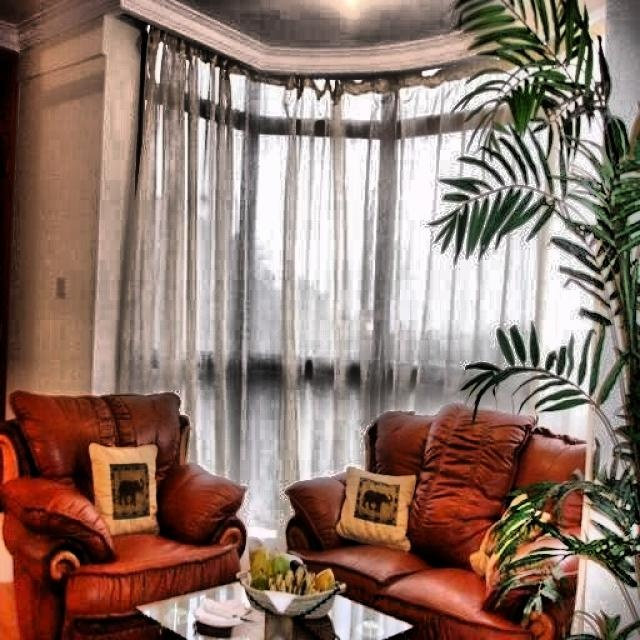

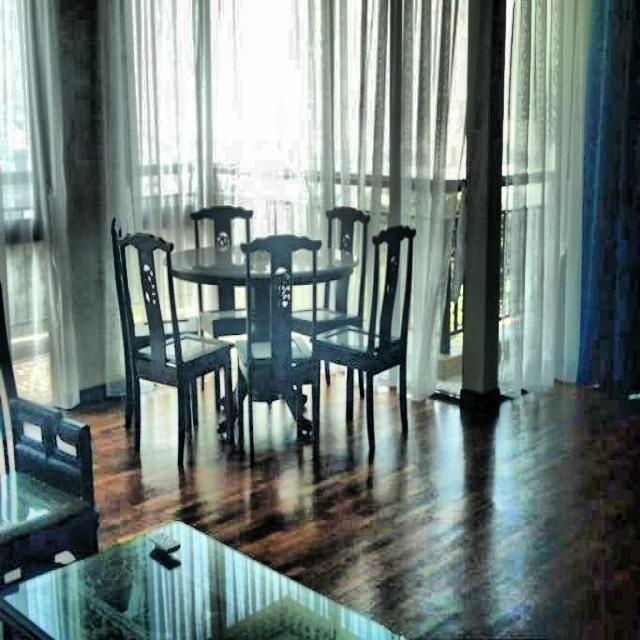

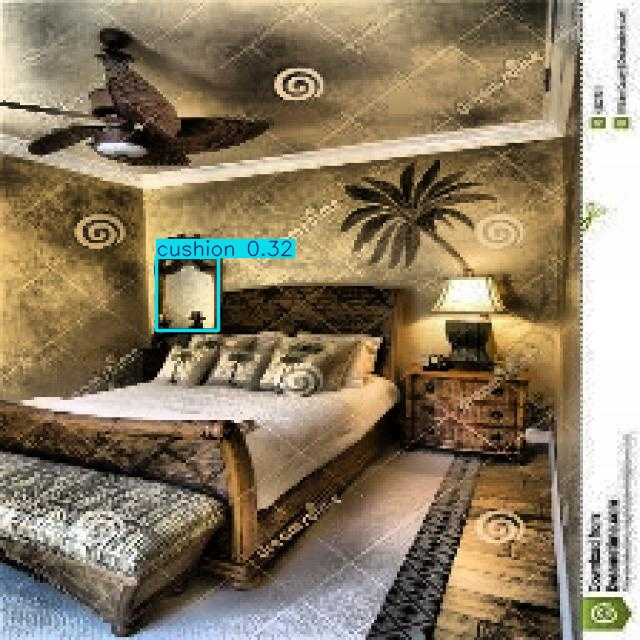

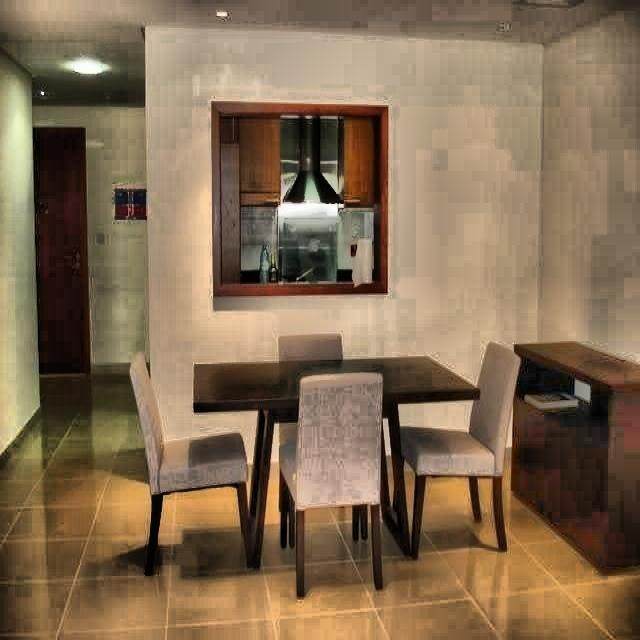

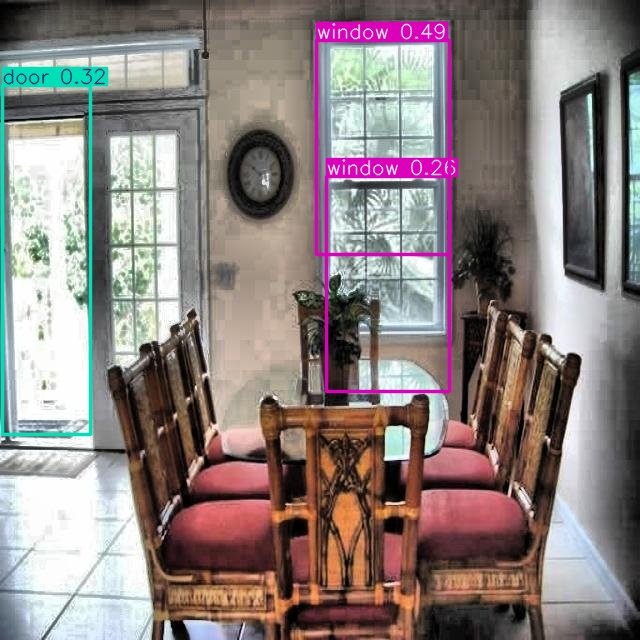

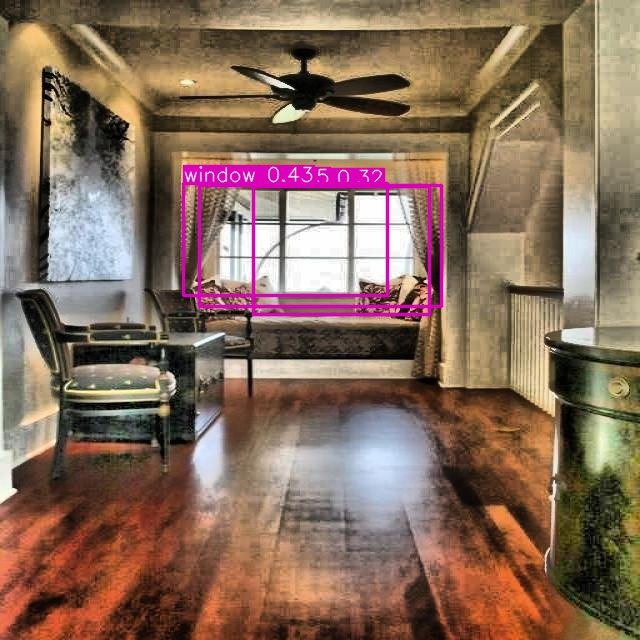

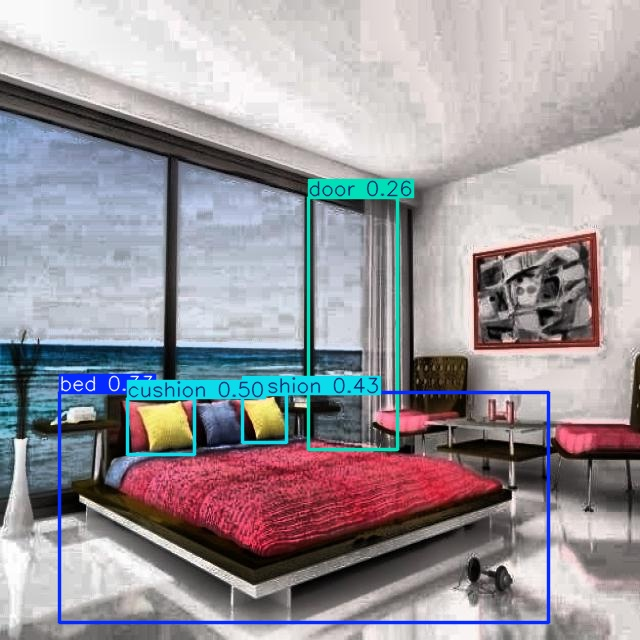

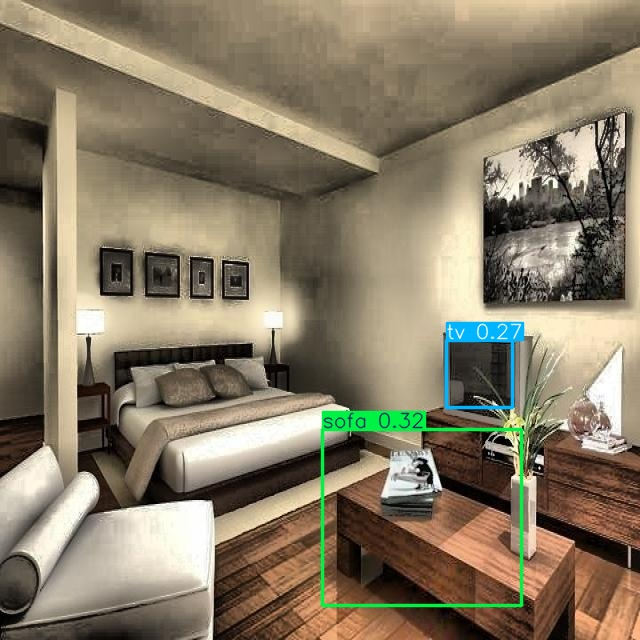

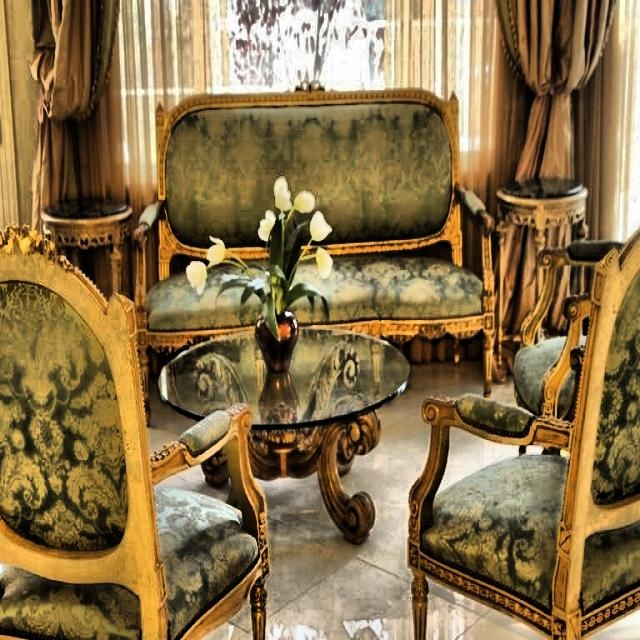

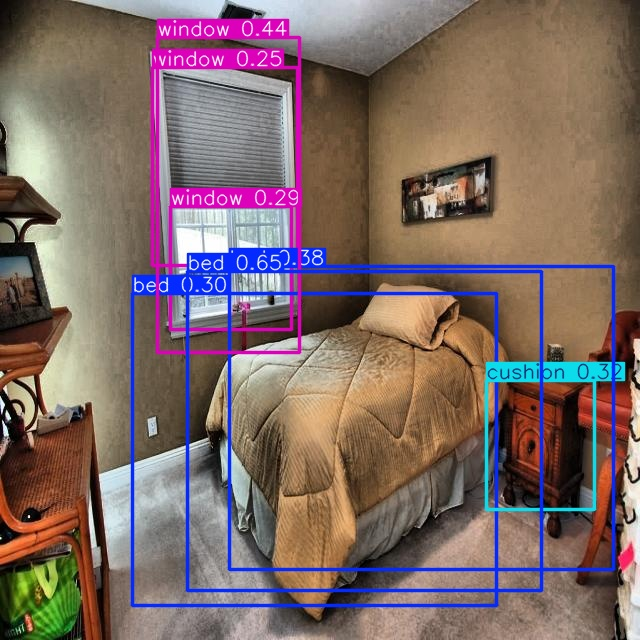

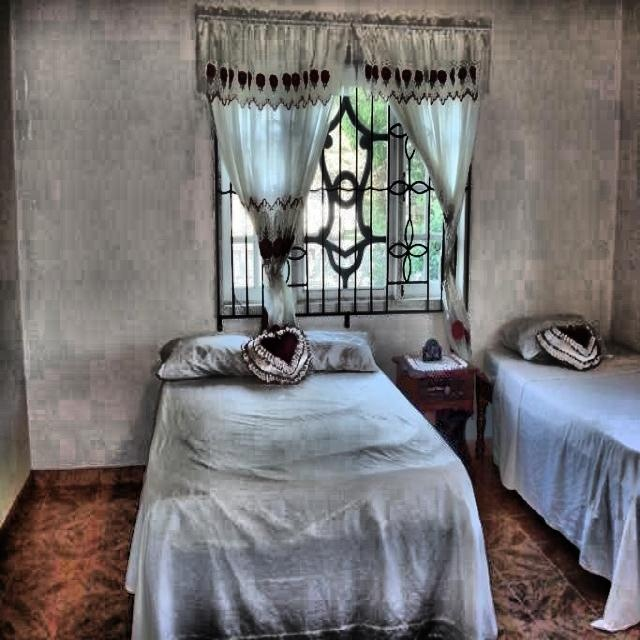

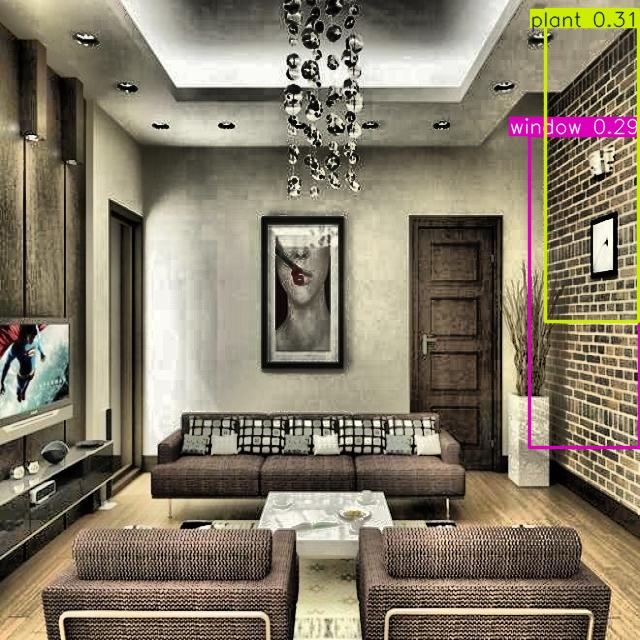

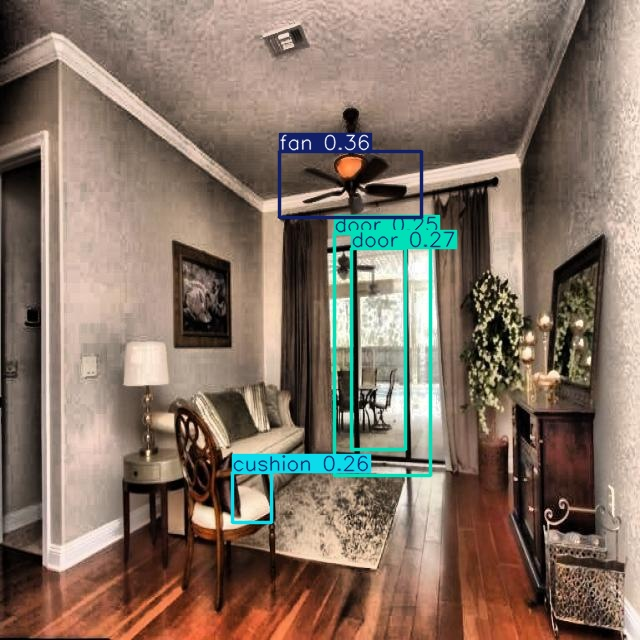

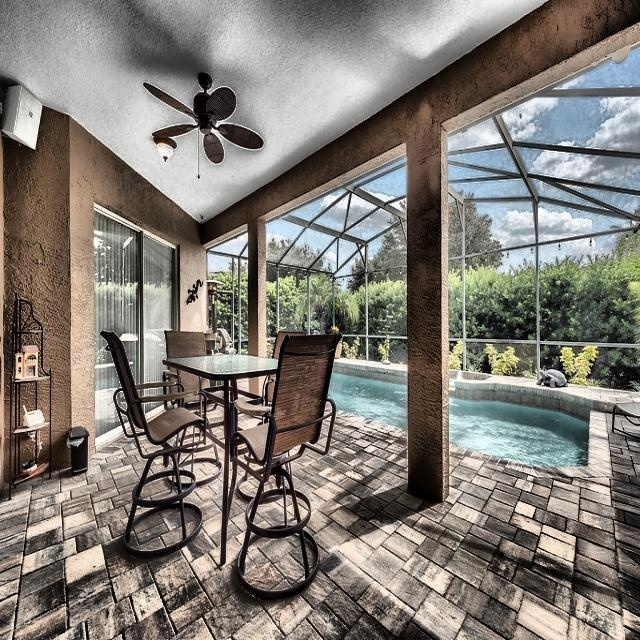

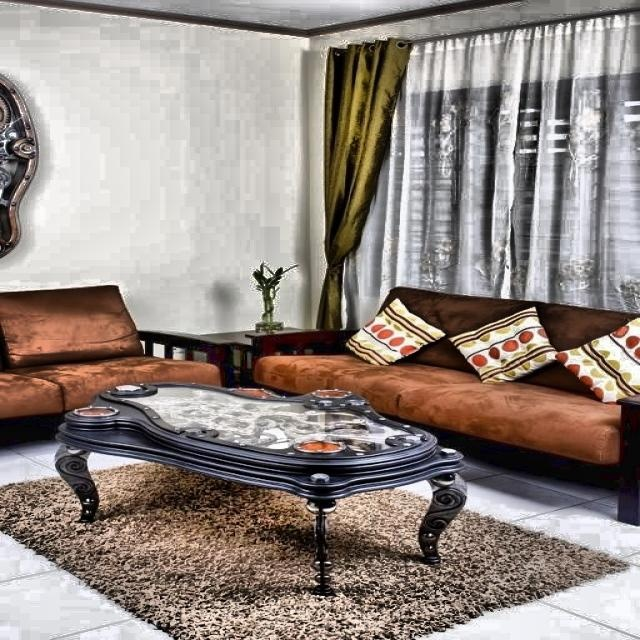

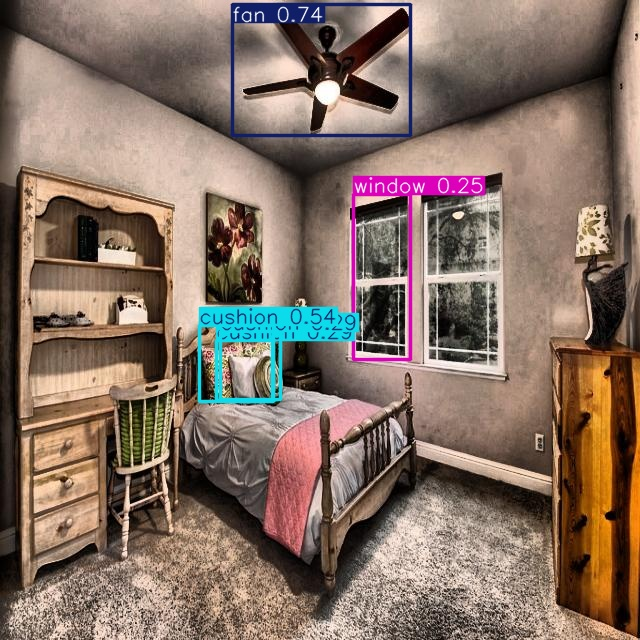

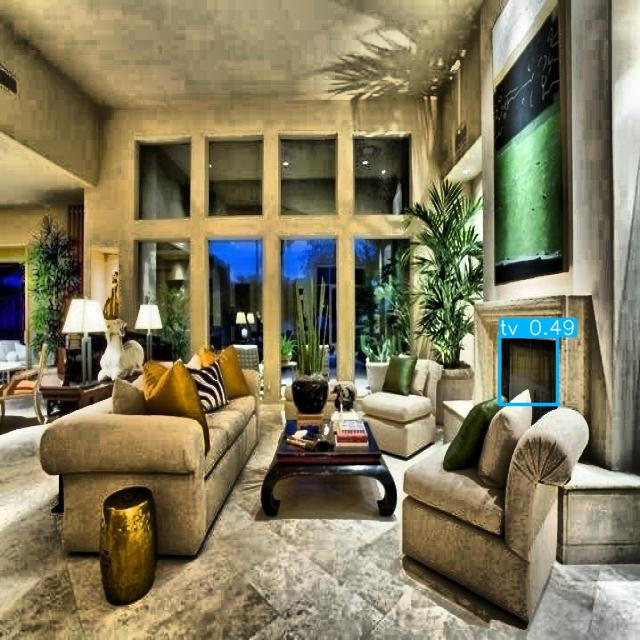

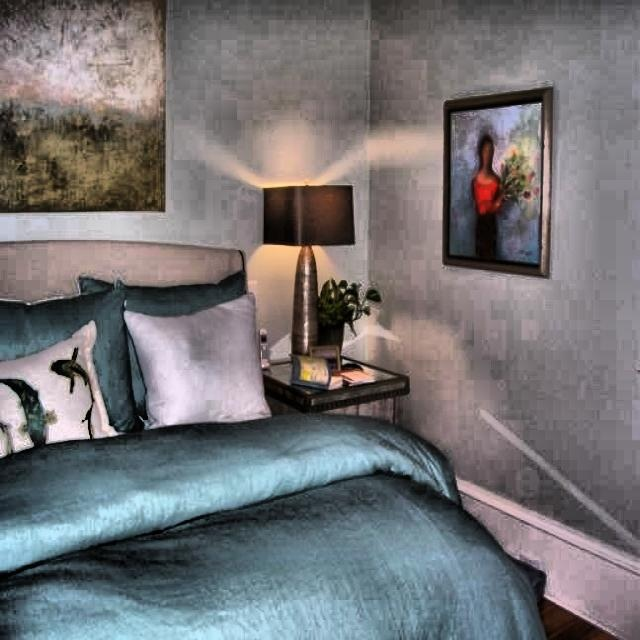

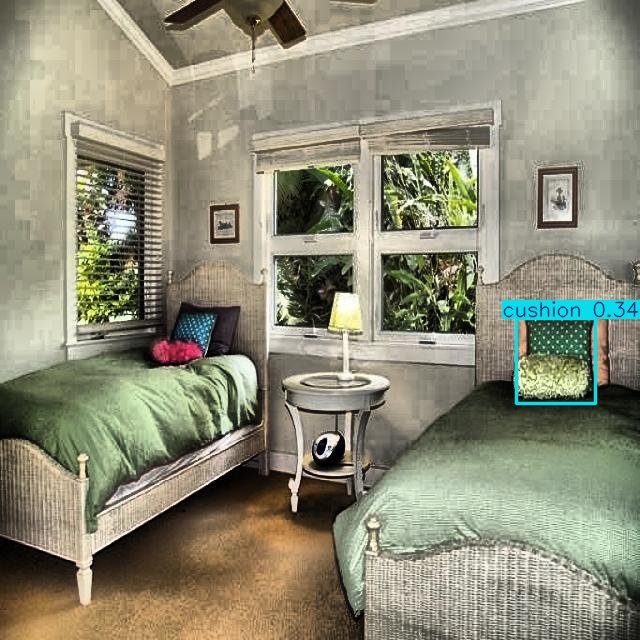

In [ ]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
  display(Image(filename=image_path, height=400))
  print('\n')


In [ ]:
# Create "my_model" folder to store model weights and train results
!mkdir /content/my_model
!cp /content/runs/detect/train/weights/best.pt /content/my_model/my_model.pt
!cp -r /content/runs/detect/train /content/my_model

# Zip into "my_model.zip"
%cd my_model
!zip /content/my_model.zip my_model.pt
!zip -r /content/my_model.zip train
%cd /content

/content/my_model
  adding: my_model.pt (deflated 11%)
  adding: train/ (stored 0%)
  adding: train/confusion_matrix.png (deflated 22%)
  adding: train/args.yaml (deflated 53%)
  adding: train/results.png (deflated 7%)
  adding: train/F1_curve.png (deflated 7%)
  adding: train/val_batch0_pred.jpg (deflated 5%)
  adding: train/confusion_matrix_normalized.png (deflated 17%)
  adding: train/train_batch2.jpg (deflated 1%)
  adding: train/val_batch1_labels.jpg (deflated 10%)
  adding: train/weights/ (stored 0%)
  adding: train/weights/best.pt (deflated 11%)
  adding: train/weights/last.pt (deflated 11%)
  adding: train/train_batch0.jpg (deflated 1%)
  adding: train/labels_correlogram.jpg (deflated 38%)
  adding: train/R_curve.png (deflated 8%)
  adding: train/val_batch1_pred.jpg (deflated 10%)
  adding: train/train_batch1.jpg (deflated 2%)
  adding: train/train_batch1102.jpg (deflated 5%)
  adding: train/train_batch1100.jpg (deflated 4%)
  adding: train/results.csv (deflated 60%)
  adding: 

In [ ]:
# This takes forever for some reason, you can also just download the model from the sidebar
from google.colab import files

files.download('/content/my_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>